In [1]:
from data_explorer import *

In [2]:
notcars_path = '../data/non-vehicles/**/*.png'
cars_path = '../data/vehicles/**/*.png'
notcars, cars = data_importer(notcars_path, cars_path)
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

data_info = data_look(cars, notcars)

print('Your function returned a count of',
  data_info["n_cars"], ' cars and',
  data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:',
      data_info["data_type"])



Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


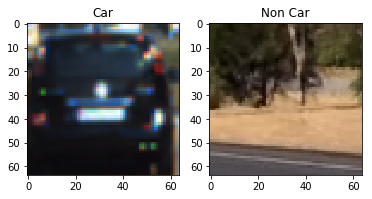

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2


%matplotlib inline
plt.subplot(121)
plt.imshow(car_image)
plt.title('Car')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Non Car')

## Hyper parameter

In [4]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

bin_size=(32, 32)
bins_range=(0, 256)
nbins=32

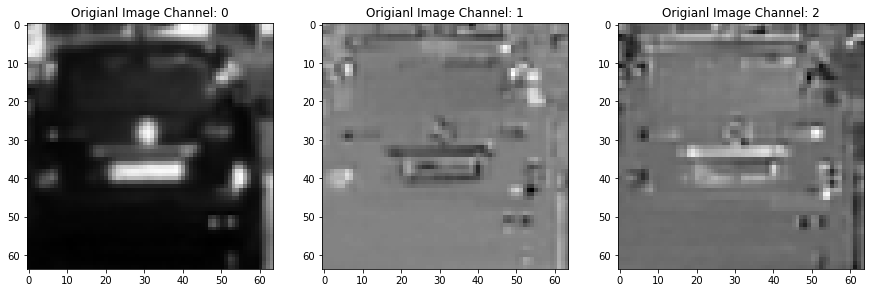

In [5]:
colorspace='YCrCb'
hog_channel='ALL'
from classifier import Feature_Extractor
from utilities import *

FE = Feature_Extractor(orient, pix_per_cell, cell_per_block)

def visualize_features(image):
    target_image = FE._get_feature_image(image, colorspace)
    plt.figure(figsize=(15,15))
    plt.imshow(target_image)
    plt.title('In YCrCb color space')
    # Different channels 
    ch = 0
    f_vec, f_image = FE._get_hog_features(img=target_image[:, :, ch], vis=True, feature_vec=True)
    plt.subplot(131)
    plt.imshow(target_image[:, :, ch], cmap='gray')
    plt.title("Origianl Image Channel: " + str(ch))
    
    ch = 1
    plt.subplot(132)
    plt.imshow(target_image[:, :, ch], cmap='gray')
    plt.title("Origianl Image Channel: " + str(ch))
    
    ch = 2
    plt.subplot(133)
    plt.imshow(target_image[:, :, ch], cmap='gray')
    plt.title("Origianl Image Channel: " + str(ch))
    
    return target_image
    
converted_car = visualize_features(car_image)

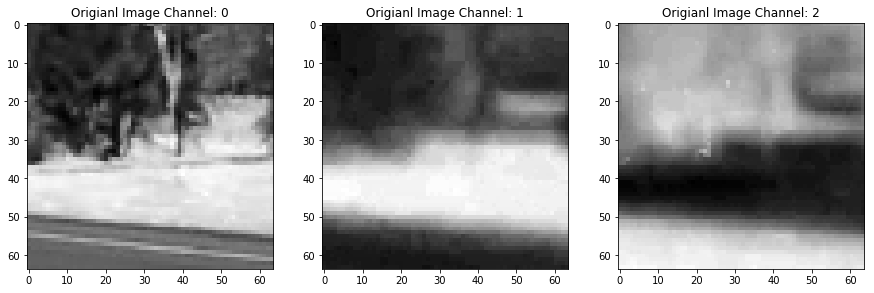

In [6]:
converted_notcar = visualize_features(notcar_image)

## HOG Features by channles

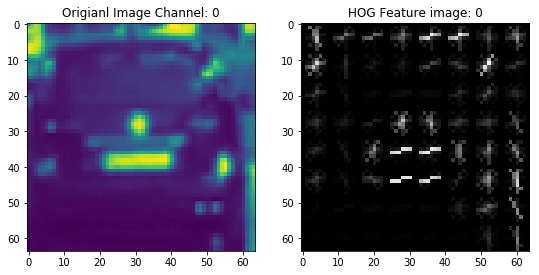

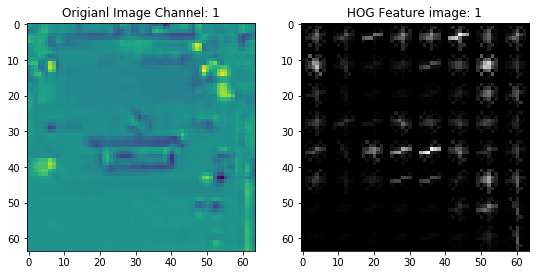

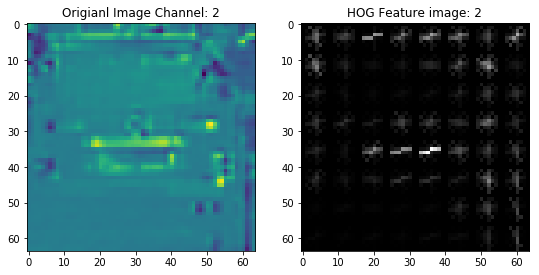

In [7]:
car_features, car_features_image = FE._get_hog_features(car_image[:, :, 0], vis=True, feature_vec=True)

def compare_origin_and_hog(image, ch, method):
    target_image = FE._get_feature_image(image, colorspace)
    f_vec, f_image = FE._get_hog_features(img=target_image[:, :, ch], vis=True, feature_vec=True)
    plt.figure(figsize=(9,9))
    plt.subplot(121)
    plt.imshow(target_image[:, :, ch])
    plt.title("Origianl Image Channel: " + str(ch))
    
    plt.subplot(122)
    plt.imshow(f_image, 'gray')
    plt.title(method + " " + "Feature image: " + str(ch))

compare_origin_and_hog(car_image, 0, "HOG")
compare_origin_and_hog(car_image, 1, "HOG")
compare_origin_and_hog(car_image, 2, "HOG")

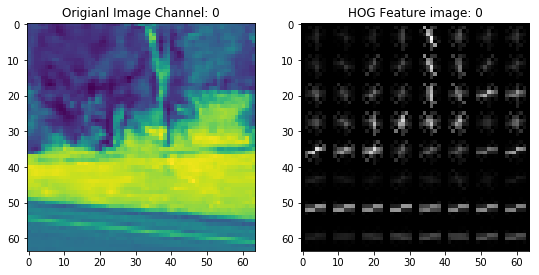

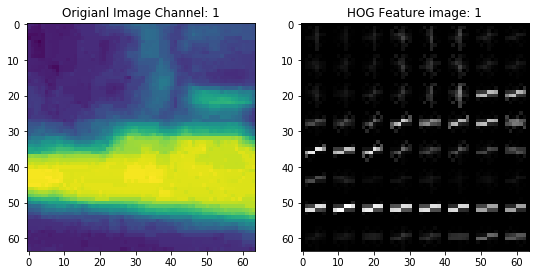

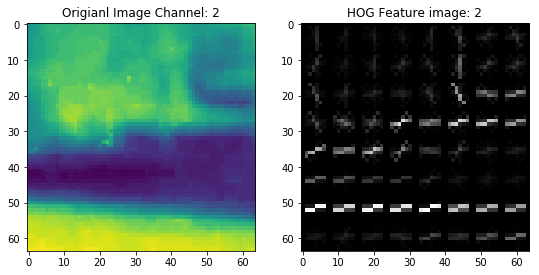

In [8]:
compare_origin_and_hog(notcar_image, 0, "HOG")
compare_origin_and_hog(notcar_image, 1, "HOG")
compare_origin_and_hog(notcar_image, 2, "HOG")

## Color Features by channels

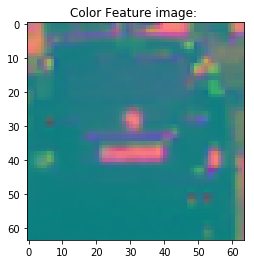

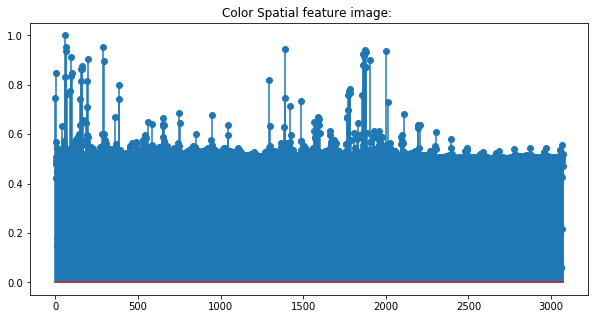

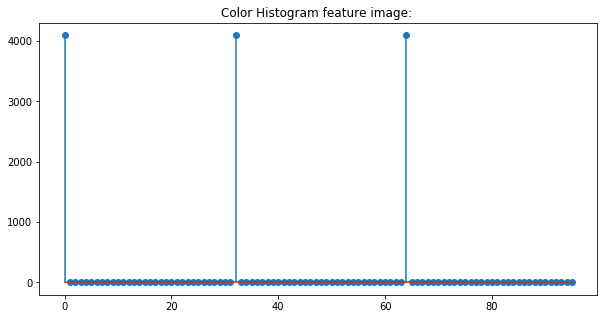

In [9]:
from utilities import *
import cv2
# import matplotlib.mlab as mlab

def compare_origin_and_color(image, method):
    target_image = FE._get_feature_image(image, colorspace)
#     f_vec, f_image = FE._get_color(target_image, vis=True, feature_vec=True)
    spatial_features = bin_spatial(target_image, size=(32, 32))
    hist_features = color_hist(target_image, nbins=32, bins_range=(0, 256))
    
    plt.figure(figsize=(4,4))
    plt.imshow(target_image)
    plt.title(method + " " + "Feature image: ")
    
    plt.figure(figsize=(10,5))
    plt.stem(spatial_features)
    plt.title(method + " " + "Spatial feature image: ")
    
    plt.figure(figsize=(10,5))
    plt.stem(hist_features)
    plt.title(method + " " + "Histogram feature image: ")
    
compare_origin_and_color(car_image, "Color")

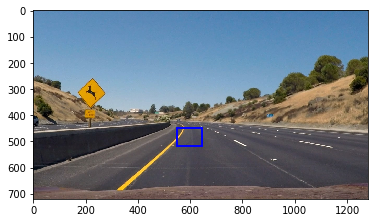

In [10]:
from detect import tracker

# tracker.car_tracker(car_image)
test_image = mpimg.imread('../test_images/test2.jpg')
# print(test_image.shape)
plt.imshow(tracker.car_tracker(test_image, True))

## Test images trials

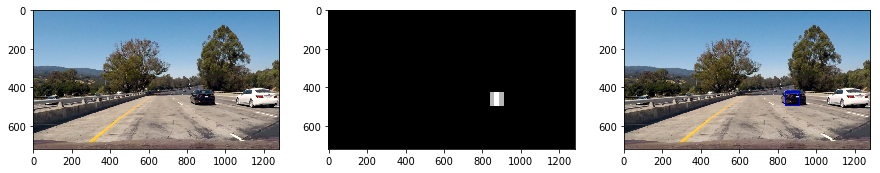

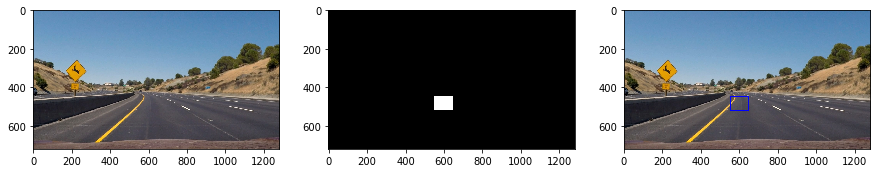

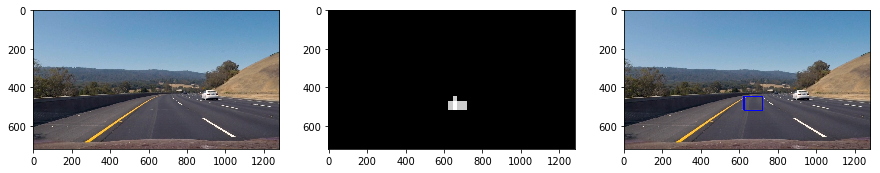

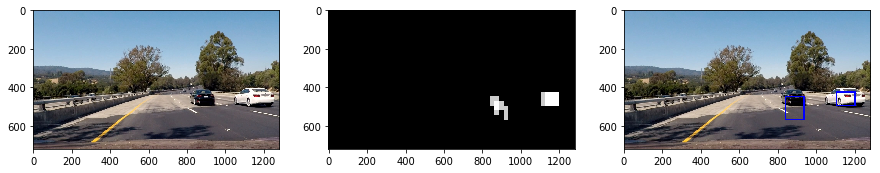

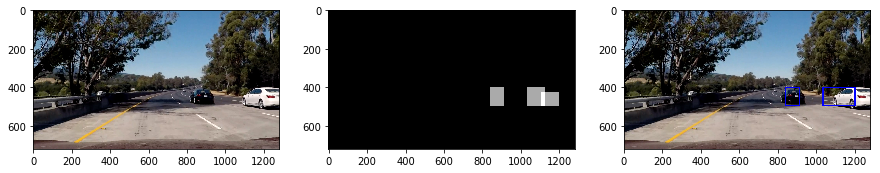

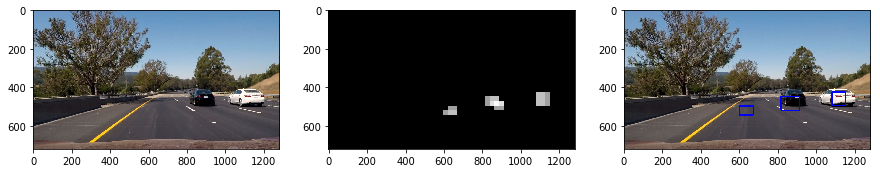

In [11]:
import glob
from scipy.ndimage.measurements import label
import numpy as np
from heat_map import *
test_images_path = '../test_images/*.jpg'
images = glob.glob(test_images_path)
for img in images:
    plt.figure(figsize=(15,15))
    image = mpimg.imread(img)
    plt.subplot(131)
    plt.imshow(image)
    
    heat = tracker.car_tracker(image, DEBUG_BOX='HEAT')
    max_heat = np.amax(heat)
    heat_threshold = max_heat * 0.6
    heat = apply_threshold(heat, heat_threshold)
    plt.subplot(132)
    plt.imshow(heat, cmap='gray')
    
    plt.subplot(133)
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    plt.imshow(draw_img)